## Manual authentication
### Get token
chain the login commands in the function get_token:

https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
https://medium.com/analytics-vidhya/build-your-own-playlist-generator-with-spotifys-api-in-python-ceb883938ce4
https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3

In [1]:
import spotifyAPI
from secret import *

token  = spotifyAPI.get_token(clientId,clientSecret)
token

'BQB_yqUYBkhf1pvfR-zBsTmwIwiV1AWC0-9BGcnBf9B9-JIi6d_v6h4K377DQO_X6p3pKInv_jvAhyQ28bs'

### Get song

In [2]:
lucy_id = spotifyAPI.get_track_id2('Lucy in the Sky', token, artist = 'The Beatles')
# spotifyAPI.get_track_id2('Lucy in the Sky with Diamonds', token)
print(lucy_id)

25yQPHgC35WNnnOUqFhgVR


https://open.spotify.com/track/25yQPHgC35WNnnOUqFhgVR

In [3]:
url = "https://open.spotify.com/track/"+lucy_id
import webbrowser
webbrowser.open(url)

True

### Get features

In [34]:
import importlib
importlib.reload(spotifyAPI)

<module 'spotifyAPI' from 'c:\\Users\\ydebray\\Downloads\\music\\spotifyAPI.py'>

In [7]:
lucy_features = spotifyAPI.get_features(lucy_id,token)
lucy_features

{'danceability': 0.311,
 'energy': 0.325,
 'key': 2,
 'loudness': -9.042,
 'mode': 1,
 'speechiness': 0.0283,
 'acousticness': 0.0469,
 'instrumentalness': 0,
 'liveness': 0.139,
 'valence': 0.668,
 'tempo': 65.09,
 'type': 'audio_features',
 'id': '25yQPHgC35WNnnOUqFhgVR',
 'uri': 'spotify:track:25yQPHgC35WNnnOUqFhgVR',
 'track_href': 'https://api.spotify.com/v1/tracks/25yQPHgC35WNnnOUqFhgVR',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25yQPHgC35WNnnOUqFhgVR',
 'duration_ms': 208467,
 'time_signature': 1}

In [30]:
# df_features = spotifyAPI.parse_features(lucy_features)
df = pd.DataFrame(lucy_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0469,0.311,0.325,0,0.139,0.0283,0.668


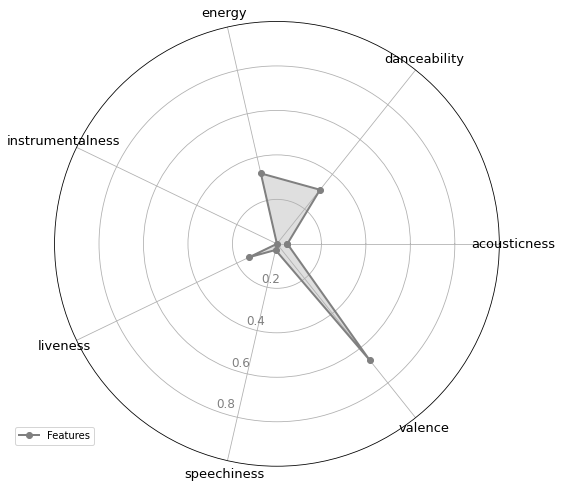

In [33]:
spotifyAPI.feature_plot(df_features)

### Get recommendations

In [49]:
json_response = spotifyAPI.get_track_reco(lucy_id,token)
uris =[]
for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

"Let's Dance - 2018 Remaster" by David Bowie
"Oh! Sweet Nuthin' - 2015 Remaster" by The Velvet Underground
"And I Love Her - Remastered 2009" by The Beatles
"Salad Days" by Mac DeMarco
"Wish You Were Here" by Pink Floyd
"Moonage Daydream - 2012 Remaster" by David Bowie
"My Sweet Lord - Remastered 2014" by George Harrison
"When I'm Sixty Four - Remastered 2009" by The Beatles
"Working Class Hero - Remastered 2010" by John Lennon
"Bennie And The Jets - Remastered 2014" by Elton John


### Advanced recommendations based on seeds
https://developer.spotify.com/console/get-recommendations/

In [ ]:
limit = 10
market = "ES"
seed_artists = "4NHQUGzhtTLFvgF5SZesLK"
seed_genre = "country"
seed_tracks = "0c6xIDDpzE81m2q797ordA"
recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&market={market}&seed_artists={seed_artists}&seed_genres={seed_genre}&seed_tracks={seed_tracks}"

headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=recUrl, headers=headers)

# print(json.dumps(res.json(), indent=2))

uris = []
json_response = res.json()

for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

### Artist albums

In [37]:
import pandas as pd
artists = pd.read_csv('spotify-artist-uris.csv', header=None, index_col=0, squeeze=True).to_dict()

In [38]:
artists['Michael Jackson']

'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'

In [1]:
from secret import *
os.environ["SPOTIPY_CLIENT_ID"] = clientId
os.environ["SPOTIPY_CLIENT_SECRET"] = clientSecret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [46]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

mj_uri = artists['Michael Jackson']
results = sp.artist_albums(mj_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Scream
XSCAPE
XSCAPE - Track by Track Commentary
Michael
Invincible
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
Manila 1996
HIStory - PAST, PRESENT AND FUTURE - BOOK I
HIStory - PAST, PRESENT AND FUTURE - BOOK I
Dangerous
Bad (Remastered)
Bad 25th Anniversary
Thriller
Thriller
Thriller 25 Super Deluxe Edition
Off the Wall
Forever Michael
Forever, Michael
Music And Me
Music & Me
Music and Me
Ben
Ben
Got To Be There
Got To Be There


In [ ]:
url = "https://open.spotify.com/artist/"+mj_uri.replace('spotify:artist:','')
import webbrowser
webbrowser.open(url)

### Artist top tracks

In [39]:
import ipywidgets as widgets
artist = widgets.Text(value='Led Zeppelin')
artist

Text(value='Led Zeppelin')

In [ ]:
# how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:
lz_uri = artists[artist.value]

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

### Search

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

The following code collects 1,000 Track IDs and their associated track name, artist name, and popularity score.
(it does not require a Spotify ID)

In [47]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

In [48]:
import pandas as pd
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_dataframe.shape)
track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94
3,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94
4,DaBaby,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,95


### Tracks

In [ ]:
from secret import *
os.environ["SPOTIPY_CLIENT_ID"] = clientId
os.environ["SPOTIPY_CLIENT_SECRET"] = clientSecret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())